In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
X = np.arange(20)
noise = 3*np.random.randn(20)

In [3]:
theta=np.array([2,3])

In [4]:
y_ideal = theta[1]*X + theta[0]
y_real = y_ideal + noise

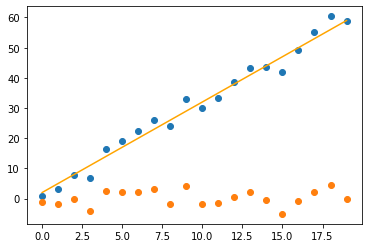

In [5]:
plt.scatter(X,y_real)
plt.scatter(X,noise)
plt.plot(X,y_ideal,color='orange')


In [6]:
 import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Configuration options
feature_vector_length = 784
num_classes = 10

# Load the data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Reshape the data - MLPs do not understand such things as '2D'.
# Reshape to 28 x 28 pixels = 784 features
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)

# Convert into greyscale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Convert target classes to categorical ones
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential()
model.add(Dense(350, input_shape=input_shape, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)

# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

ModuleNotFoundError: No module named 'tensorflow'